### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px


### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [33]:
data = pd.read_csv('data/coupons.csv')

In [34]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [35]:
data.info()
# unique_values = data['occupation'].unique()
# for value in unique_values:
#    print(value)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

In [36]:
# drop all row with missing value
data.dropna(subset=['CoffeeHouse', 'Restaurant20To50','Bar','CarryAway','RestaurantLessThan20','Restaurant20To50'], inplace=True)
#fill "No info" in row with missing value in column"car"
data['car'].fillna('No info', inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12079 entries, 22 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  car                   12079 non-null  object
 15  Bar                   12079 non-nul

4. What proportion of the total observations chose to accept the coupon? 



In [37]:
total_rows = len(data)  # Get the total number of rows
count_1 = data['Y'].sum()  # Count the number of rows where "Y" is equal to 1

proportion_1 = count_1 / total_rows  # Calculate the proportion of rows with value 1
print("Number of accepted coupons", count_1)
print("Proportion of rows with value 1 in column 'Y':", proportion_1)

Number of accepted coupons 6877
Proportion of rows with value 1 in column 'Y': 0.5693352098683666


5. Use a bar plot to visualize the `coupon` column.

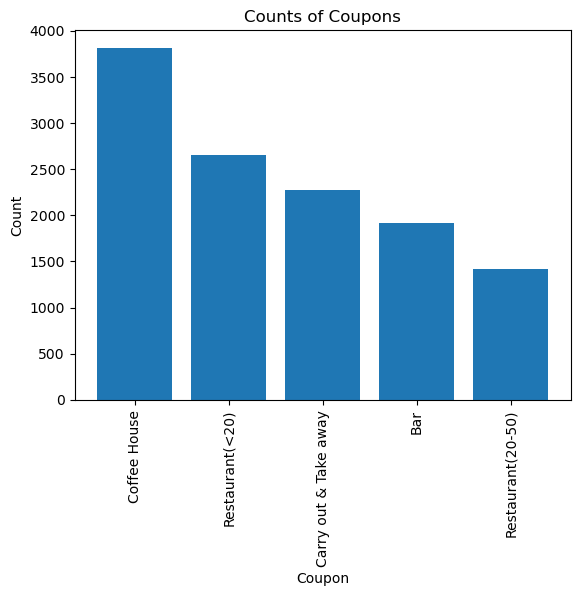

In [38]:
coupon_counts = data['coupon'].value_counts()

# Create a bar plot
plt.bar(coupon_counts.index, coupon_counts.values)
plt.xlabel('Coupon')
plt.ylabel('Count')
plt.title('Counts of Coupons')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()


In the Amazon data set of coupons, the Coffee House's coupons stand out as the largest, with nearly 4000 
offers available. Following that, there are over 2500 coupons for restaurants with a ticket size of less 
than USD 20 per person. Carry out and take away coupons account for 2300 offers, while bar coupons are 
close behind with almost 2000 available. Lastly, there are approximately 1500 coupons for restaurants 
with a ticket size ranging from USD 20 to 50 per person.



6. Use a histogram to visualize the temperature column.

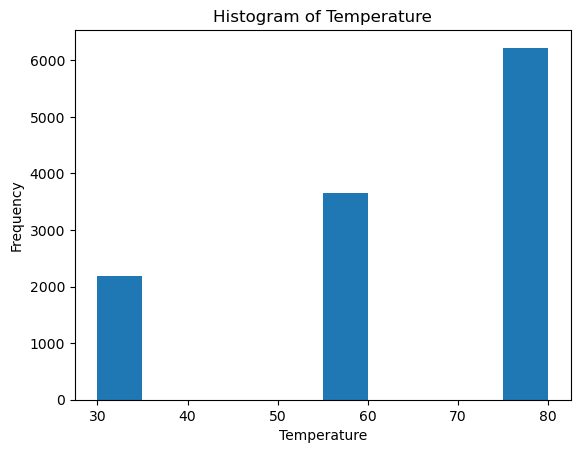

In [39]:
plt.hist(data['temperature'], bins=10)

# Add labels and title
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Histogram of Temperature')

# Display the plot
plt.show()








**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [40]:
bar_coupons_df = data[data['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


In [41]:
#total_rows = len(bar_coupons_df)  # Get the total number of rows
total_rows = len(bar_coupons_df) 
count_1 = bar_coupons_df['Y'].sum()  # Count the number of rows where "Y" is equal to 1

proportion_1 = count_1 / total_rows  # Calculate the proportion of rows with value 1
print('total rows', total_rows)
print("Number of accepted coupons", count_1)
print("Proportion of rows with value 1 in column 'Y':", proportion_1)

total rows 1913
Number of accepted coupons 788
Proportion of rows with value 1 in column 'Y': 0.41191845269210664


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [42]:
# Filter the data for those who went to a bar 3 or fewer times a month
less_than_3_times = bar_coupons_df[bar_coupons_df['Bar'].isin(['never', 'less1', '1~3'])]
# Filter the data for those who went to a bar more than 3 times a month
more_than_3_times = bar_coupons_df[bar_coupons_df['Bar'].isin(['4~8', 'gt8'])]
unique_bars = bar_coupons_df['Bar'].unique()
print("Unique values of column 'Bar'",unique_bars)
# Calculate the acceptance rates for each group

# For those who went to a bar 3 or fewer times a month

n_less_than_3_times_acceptance_rate = less_than_3_times[less_than_3_times['Y'] == 1].shape[0] / less_than_3_times.shape[0] 
print('Acceptance rate for those who went to a bar 3 or fewer times a month:',n_less_than_3_times_acceptance_rate)

# For those who went to a bar more than 3 times a month

n_more_than_3_times_acceptance_rate = more_than_3_times[more_than_3_times['Y'] == 1].shape[0] / more_than_3_times.shape[0]
print('Acceptance rate for those who went to a bar more than 3 times a month:',n_more_than_3_times_acceptance_rate)



Unique values of column 'Bar' ['never' 'less1' '1~3' 'gt8' '4~8']
Acceptance rate for those who went to a bar 3 or fewer times a month: 0.37267441860465117
Acceptance rate for those who went to a bar more than 3 times a month: 0.7616580310880829


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [43]:
#Type 1: Drivers who go to a bar more than once a month and are over the age of 25

# Filter the data for those who went to a bar more than 1 a month 
go_bar_more_than_1_a_month = bar_coupons_df[bar_coupons_df['Bar'].isin(['1~3','4~8','gt8'])]

# Filter the data for those who are over the age of 25 
unique_age = data['age'].unique()
print(unique_age)
driver_age_over_25 = go_bar_more_than_1_a_month[~go_bar_more_than_1_a_month['age'].isin(['21','below21'])]

type_1_acceptance_rate = driver_age_over_25[driver_age_over_25['Y'] == 1].shape[0] / driver_age_over_25.shape[0]
print('type 1 acceptance rate',type_1_acceptance_rate)
# type 2 - all the othres : drivers who went to a bar less than 1 a month 
go_bar_less_than_1_a_month = bar_coupons_df[bar_coupons_df['Bar'].isin(['never','less1'])]
type_2_acceptance_rate = go_bar_less_than_1_a_month[go_bar_less_than_1_a_month['Y'] == 1].shape[0] / go_bar_less_than_1_a_month.shape[0]
print('type 2 acceptance rate',type_2_acceptance_rate)


['21' '46' '26' '31' '41' '50plus' '36' 'below21']
type 1 acceptance rate 0.6898263027295285
type 2 acceptance rate 0.2953020134228188


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [44]:

# Filter the data for those who went to a bar more than 1 a month - type x
go_bar_more_than_1_a_month = bar_coupons_df[bar_coupons_df['Bar'].isin(['1~3','4~8','gt8'])]

    
# Filter the data for those who's passengers were not a kid and had occupations other than farming, fishing, or forestry. - type z

passengers_not_a_kid = bar_coupons_df[~bar_coupons_df['passanger'].isin(['Kid(s)'])]
excluded_occupations = ['Farming Fishing & Forestry']
occupations_excluding = passengers_not_a_kid[~passengers_not_a_kid['occupation'].isin(excluded_occupations)]
                                            
occupations_excluding_acceptance_rate = occupations_excluding[occupations_excluding['Y'] == 1].shape[0] / occupations_excluding.shape[0]
print('type 3 acceptance rate',occupations_excluding_acceptance_rate)

# All the others group - drivers who wnet to a bar less than 1 a month 
go_bar_less_than_1_a_month = bar_coupons_df[bar_coupons_df['Bar'].isin(['never','less1'])]
type_2_acceptance_rate = go_bar_less_than_1_a_month[go_bar_less_than_1_a_month['Y'] == 1].shape[0] / go_bar_less_than_1_a_month.shape[0]
print('type 2 acceptance rate',type_2_acceptance_rate)


type 3 acceptance rate 0.4349095154699358
type 2 acceptance rate 0.2953020134228188


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [45]:
#Type 4 driver: go to bars more than once a month, had passengers that were not a kid, and were not widowed OR
unique_maritalStatus = bar_coupons_df['maritalStatus'].unique()
print('Unique values of column maritalstatus: ', unique_maritalStatus)
go_bar_more_than_1_a_month = bar_coupons_df[bar_coupons_df['Bar'].isin(['1~3','4~8','gt8'])]
passengers_not_a_kid = go_bar_more_than_1_a_month[~go_bar_more_than_1_a_month['passanger'].isin(['Kid(s)'])]
passenger_were_not_widowed = passengers_not_a_kid[~passengers_not_a_kid['maritalStatus'].isin(['Widowed'])]
type_4__driver_acceptance_rate = passenger_were_not_widowed[passenger_were_not_widowed['Y'] == 1].shape[0] / passenger_were_not_widowed.shape[0]

# Type 5 driver: Go to bars more than once a month and are under the age of 30
unique_age = bar_coupons_df['age'].unique()
#print('Unique values of column age: ', unique_age)
age_under_30 = ['below21', '21', '26']
passenger_bar_more_one_m_under_30 = go_bar_more_than_1_a_month[go_bar_more_than_1_a_month['age'].isin(age_under_30)]
type_5__driver_acceptance_rate = passenger_bar_more_one_m_under_30[passenger_bar_more_one_m_under_30['Y'] == 1].shape[0] / passenger_bar_more_one_m_under_30.shape[0]

# Type 6 driver: go to cheap restaurants more than 4 times a month and income is less than 50K.

unique_res_less_than20 = data['RestaurantLessThan20'].unique()
unique_income = data['income'].unique()
print('column RestaurantLessThan20 unique values:   ', unique_res_less_than20)
print('column income unique values: ', unique_income)
#data.info()

# Filter the data for those drivers who went to cheap restaurants more than 4 times 
cheap_res_more_than_4_times = bar_coupons_df[bar_coupons_df['RestaurantLessThan20'].isin(['4~8', 'gt8'])]

# Filter the data for those drivers who's income was less than 50K  
income_less_than_50k = cheap_res_more_than_4_times[cheap_res_more_than_4_times['income'].isin(['$12500 - $24999', '$37500 - $49999', '$25000 - $37499'])]
type_6_driver_acceptance_rate = income_less_than_50k[income_less_than_50k['Y'] == 1].shape[0] / income_less_than_50k.shape[0]

# Print the results

print('Type 4 drivers acceptance_rate equals:', type_4__driver_acceptance_rate)                                                                                                   
print('Type 5 drivers acceptance_rate equals:', type_5__driver_acceptance_rate)
print('Type 6 drivers acceptance_rate equals:', type_6_driver_acceptance_rate)



Unique values of column maritalstatus:  ['Single' 'Married partner' 'Unmarried partner' 'Divorced' 'Widowed']
column RestaurantLessThan20 unique values:    ['4~8' '1~3' 'less1' 'gt8' 'never']
column income unique values:  ['$62500 - $74999' '$12500 - $24999' '$75000 - $87499' '$50000 - $62499'
 '$37500 - $49999' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
 'Less than $12500']
Type 4 drivers acceptance_rate equals: 0.7094339622641509
Type 5 drivers acceptance_rate equals: 0.7195121951219512
Type 6 drivers acceptance_rate equals: 0.46153846153846156


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

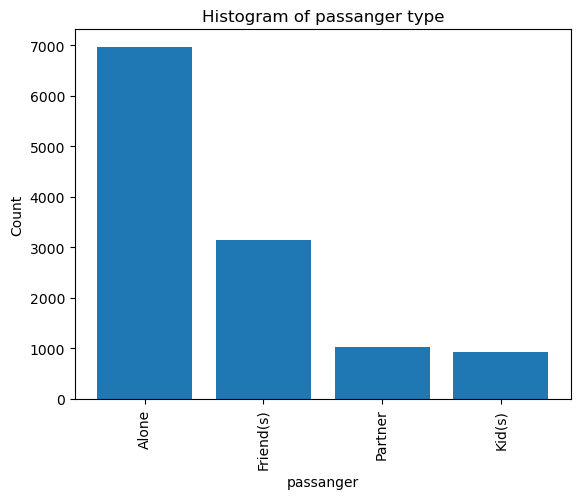

In [46]:
coupon_counts = data['passanger'].value_counts()

# Create a bar plot
plt.bar(coupon_counts.index, coupon_counts.values)
plt.xlabel('passanger')
plt.ylabel('Count')
plt.title('Histogram of passanger type')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()

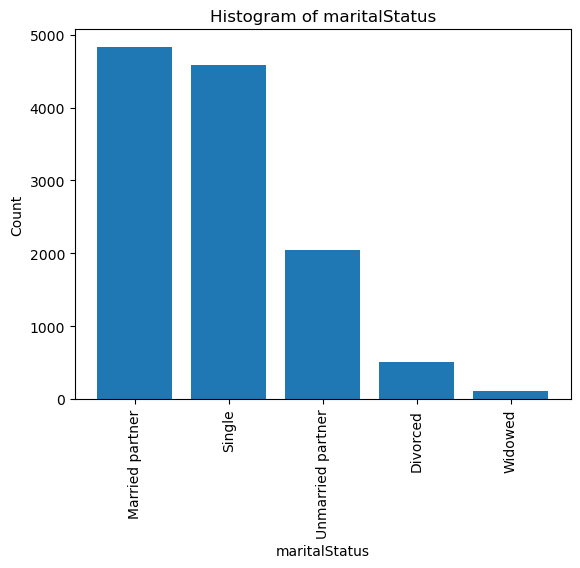

Unique values of column maritalstatus:  ['Single' 'Married partner' 'Unmarried partner' 'Divorced' 'Widowed']


In [47]:
coupon_counts = data['maritalStatus'].value_counts()

# Create a bar plot
plt.bar(coupon_counts.index, coupon_counts.values)
plt.xlabel('maritalStatus')
plt.ylabel('Count')
plt.title('Histogram of maritalStatus')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()

unique_maritalStatus = bar_coupons_df['maritalStatus'].unique()
print('Unique values of column maritalstatus: ', unique_maritalStatus)

In [48]:
# Filter the data for married partner
married_partner = data[data['maritalStatus'].isin(['Married partner'])]
married_partner_acceptance_rate = married_partner[married_partner['Y'] == 1].shape[0] / married_partner.shape[0] 
print('Acceptance rate for married partners:',married_partner_acceptance_rate)

# Filter the data for singles
single_driver = data[data['maritalStatus'].isin(['Single'])]
single_driver_acceptance_rate = single_driver[single_driver['Y'] == 1].shape[0] / single_driver.shape[0] 
print('Acceptance rate for single drivers:',single_driver_acceptance_rate)

# Filter the data for unmarried partners
unmarried_partner = data[data['maritalStatus'].isin(['Unmarried partner'])]
umarried_partner_acceptance_rate = unmarried_partner[unmarried_partner['Y'] == 1].shape[0] / unmarried_partner.shape[0] 
print('Acceptance rate for unmarried partners:',umarried_partner_acceptance_rate)

# Filter the data for divorced drivers
divorced_partner = data[data['maritalStatus'].isin(['Divorced'])]
divorced_partner_acceptance_rate = divorced_partner[divorced_partner['Y'] == 1].shape[0] / divorced_partner.shape[0] 
print('Acceptance rate for divorced drivers:',divorced_partner_acceptance_rate)

# Filter the data for widowed drivers
widowed_driver = data[data['maritalStatus'].isin(['Widowed'])]
widowed_driver_acceptance_rate = widowed_driver[widowed_driver['Y'] == 1].shape[0] / widowed_driver.shape[0] 
print('Acceptance rate for widowed_drivers:',widowed_driver_acceptance_rate)

Acceptance rate for married partners: 0.5429517698199131
Acceptance rate for single drivers: 0.6102877070619006
Acceptance rate for unmarried partners: 0.5556640625
Acceptance rate for divorced drivers: 0.5257936507936508
Acceptance rate for widowed_drivers: 0.4722222222222222


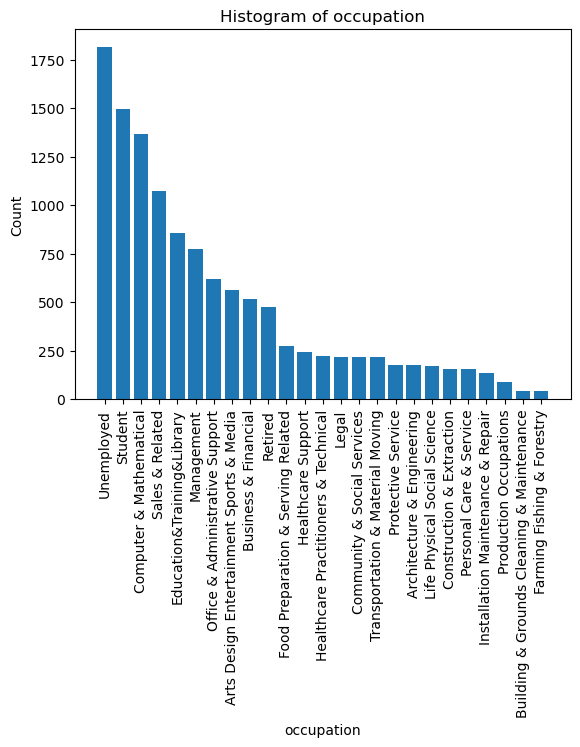

In [49]:
coupon_counts = data['occupation'].value_counts()

# Create a bar plot
plt.bar(coupon_counts.index, coupon_counts.values)
plt.xlabel('occupation')
plt.ylabel('Count')
plt.title('Histogram of occupation')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()

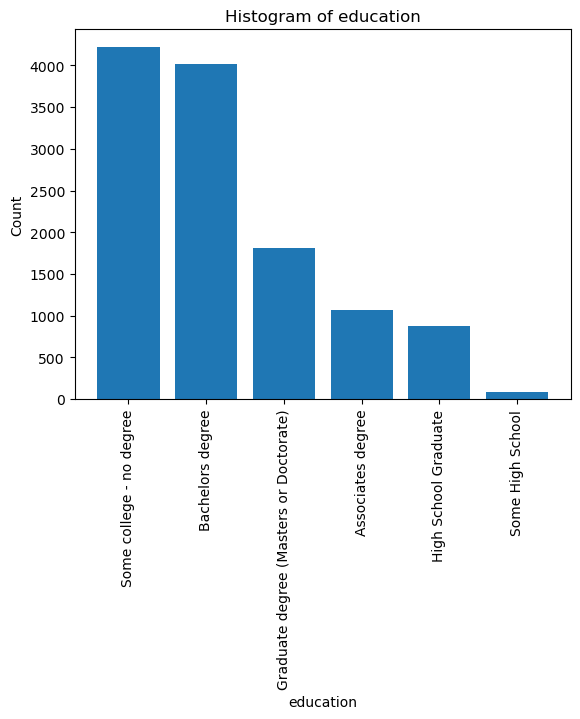

In [50]:
coupon_counts = data['education'].value_counts()

# Create a bar plot
plt.bar(coupon_counts.index, coupon_counts.values)
plt.xlabel('education')
plt.ylabel('Count')
plt.title('Histogram of education')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()

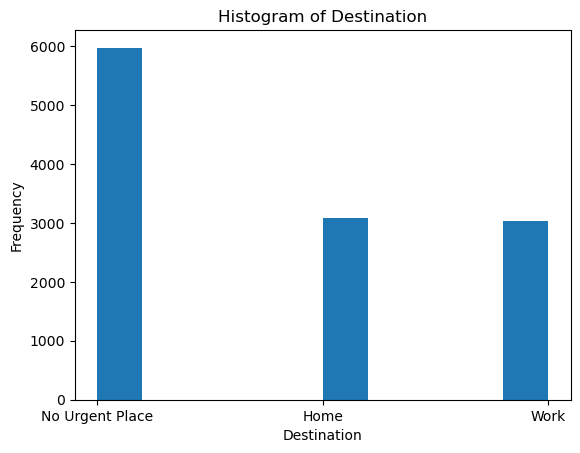

In [51]:
plt.hist(data['destination'], bins=10)

# Add labels and title
plt.xlabel('Destination')
plt.ylabel('Frequency')
plt.title('Histogram of Destination')

# Display the plot
plt.show()


In [52]:
# Filter the data for those who went home



go_home = data[data['destination'].isin(['Home'])]

go_home_acceptance_rate = go_home[go_home['Y'] == 1].shape[0] / go_home.shape[0] 
print('Acceptance rate for those who went home:',go_home_acceptance_rate)

go_work = data[data['destination'].isin(['Work'])]
go_work_acceptance_rate = go_work[go_work['Y'] == 1].shape[0] / go_work.shape[0] 
print('Acceptance rate for those who went to work:',go_work_acceptance_rate)

go_to_No_urgent_place = data[data['destination'].isin(['No Urgent Place'])]
go_to_No_urgent_place_acceptance_rate = go_to_No_urgent_place[go_to_No_urgent_place['Y'] == 1].shape[0] / go_to_No_urgent_place.shape[0] 
print('Acceptance rate for those who went to no urgent place:',go_to_No_urgent_place_acceptance_rate)

Acceptance rate for those who went home: 0.5082658022690437
Acceptance rate for those who went to work: 0.503968253968254
Acceptance rate for those who went to no urgent place: 0.6340033500837521


In [53]:
cfh_coupons_df = data[data['coupon'] == 'Coffee House']
data.info()
cfh_coupons_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12079 entries, 22 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  car                   12079 non-null  object
 15  Bar                   12079 non-nul

In [54]:
#total_rows = len(bar_coupons_df)  # Get the total number of rows
total_rows = len(cfh_coupons_df) 
count_1 = cfh_coupons_df['Y'].sum()  # Count the number of rows where "Y" is equal to 1

proportion_1 = count_1 / total_rows  # Calculate the proportion of rows with value 1
print('total rows', total_rows)
print("Number of accepted coupons", count_1)
print("Proportion of rows with value 1 in column 'Y':", proportion_1)

total rows 3816
Number of accepted coupons 1894
Proportion of rows with value 1 in column 'Y': 0.49633123689727465


In [55]:
# Filter the data for those who went to a Coffee House 3 or fewer times a month
less_than_3_times = cfh_coupons_df[cfh_coupons_df['CoffeeHouse'].isin(['never', 'less1', '1~3'])]
# Filter the data for those who went to a CoffeeHouse more than 3 times a month
more_than_3_times = cfh_coupons_df[cfh_coupons_df['CoffeeHouse'].isin(['4~8', 'gt8'])]
unique_cfh = cfh_coupons_df['CoffeeHouse'].unique()
print("Unique values of column 'CoffeeHouse'",unique_bars)
# Calculate the acceptance rates for each group

# For those who went to a bar 3 or fewer times a month

n_less_than_3_times_acceptance_rate = less_than_3_times[less_than_3_times['Y'] == 1].shape[0] / less_than_3_times.shape[0] 
print('Acceptance rate for those who went to a Coffee House 3 or fewer times a month:',n_less_than_3_times_acceptance_rate)

# For those who went to a bar more than 3 times a month

n_more_than_3_times_acceptance_rate = more_than_3_times[more_than_3_times['Y'] == 1].shape[0] / more_than_3_times.shape[0]
print('Acceptance rate for those who went to a Coffee House more than 3 times a month:',n_more_than_3_times_acceptance_rate)



Unique values of column 'CoffeeHouse' ['never' 'less1' '1~3' 'gt8' '4~8']
Acceptance rate for those who went to a Coffee House 3 or fewer times a month: 0.44590495449949447
Acceptance rate for those who went to a Coffee House more than 3 times a month: 0.6725559481743227


In [56]:
#Type 1: Drivers who go to a Coffee House more than once a month and are over the age of 25


# Filter the data for those who went to a bar more than 1 a month 
go_cfh_more_than_1_a_month = cfh_coupons_df[cfh_coupons_df['CoffeeHouse'].isin(['1~3','4~8','gt8'])]

# Filter the data for those who are over the age of 25 
unique_age = data['age'].unique()
print(unique_age)
driver_age_over_25 = go_cfh_more_than_1_a_month[~go_cfh_more_than_1_a_month['age'].isin(['21','below21'])]

type_1_acceptance_rate = driver_age_over_25[driver_age_over_25['Y'] == 1].shape[0] / driver_age_over_25.shape[0]
print('type 1 acceptance rate',type_1_acceptance_rate)
# Type 2 - all the othres : drivers who went to a Coffee House less than 1 a month 
go_cfh_less_than_1_a_month = cfh_coupons_df[cfh_coupons_df['CoffeeHouse'].isin(['never','less1'])]
type_2_acceptance_rate = go_cfh_less_than_1_a_month[go_cfh_less_than_1_a_month['Y'] == 1].shape[0] / go_cfh_less_than_1_a_month.shape[0]
print('type 2 acceptance rate',type_2_acceptance_rate)

['21' '46' '26' '31' '41' '50plus' '36' 'below21']
type 1 acceptance rate 0.6395522388059701
type 2 acceptance rate 0.34034907597535935


In [57]:

# Filter the data for those who went to a Coffee House more than 1 a month - type 2
go_cfh_more_than_1_a_month = cfh_coupons_df[cfh_coupons_df['CoffeeHouse'].isin(['1~3','4~8','gt8'])]

    
# Filter the data for those who's passengers were not a kid and had occupations other than Unemployed. - type 3

passengers_not_a_kid = cfh_coupons_df[~cfh_coupons_df['passanger'].isin(['Kid(s)'])]
excluded_occupations = ['Student']
occupations_excluding = passengers_not_a_kid[~passengers_not_a_kid['occupation'].isin(excluded_occupations)]
                                            
occupations_excluding_acceptance_rate = occupations_excluding[occupations_excluding['Y'] == 1].shape[0] / occupations_excluding.shape[0]
print('type 3 acceptance rate',occupations_excluding_acceptance_rate)

# All the others group - drivers who wnet to a bar less than 1 a month 
go_cfh_less_than_1_a_month = cfh_coupons_df[cfh_coupons_df['CoffeeHouse'].isin(['never','less1'])]
type_2_acceptance_rate = go_cfh_less_than_1_a_month[go_cfh_less_than_1_a_month['Y'] == 1].shape[0] / go_cfh_less_than_1_a_month.shape[0]
print('type 2 acceptance rate',type_2_acceptance_rate)


type 3 acceptance rate 0.4808362369337979
type 2 acceptance rate 0.34034907597535935


In [58]:
#Type 4 driver: go to Coffee House more than once a month, had passengers that were not a kid, and were not married OR
unique_maritalStatus = cfh_coupons_df['maritalStatus'].unique()
print('Unique values of column maritalstatus: ', unique_maritalStatus)
go_cfh_more_than_1_a_month = cfh_coupons_df[cfh_coupons_df['CoffeeHouse'].isin(['1~3','4~8','gt8'])]
passengers_not_a_kid = go_cfh_more_than_1_a_month[~go_cfh_more_than_1_a_month['passanger'].isin(['Kid(s)'])]
passenger_were_single = passengers_not_a_kid[passengers_not_a_kid['maritalStatus'].isin(['Single'])]
type_4__driver_acceptance_rate = passenger_were_single[passenger_were_single['Y'] == 1].shape[0] / passenger_were_single.shape[0]

# Type 5 driver: Go to Coffee House more than once a month and are under the age of 30
unique_age = cfh_coupons_df['age'].unique()
#print('Unique values of column age: ', unique_age)
age_under_30 = ['below21', '21', '26']
passenger_cfh_more_one_m_under_30 = go_cfh_more_than_1_a_month[go_cfh_more_than_1_a_month['age'].isin(age_under_30)]
type_5__driver_acceptance_rate = passenger_cfh_more_one_m_under_30[passenger_cfh_more_one_m_under_30['Y'] == 1].shape[0] / passenger_cfh_more_one_m_under_30.shape[0]

# Type 6 driver: go to Restaurants($20-$50 per person more than 4 times a month and income is less than 50K.

unique_res_less_than20 = data['Restaurant20To50'].unique()
unique_income = data['income'].unique()
print('column Restaurant20To50 unique values:   ', unique_res_less_than20)
print('column income unique values: ', unique_income)
#data.info()

# Filter the data for those drivers who went to cheap Restaurant (20To50) more than 4 times 
go_res_more_than_4_times = cfh_coupons_df[cfh_coupons_df['Restaurant20To50'].isin(['4~8', 'gt8'])]

# Filter the data for those drivers who's income was less than 50K  
income_less_than_50k = go_res_more_than_4_times[go_res_more_than_4_times['income'].isin(['$12500 - $24999', '$37500 - $49999', '$25000 - $37499'])]
type_6_driver_acceptance_rate = income_less_than_50k[income_less_than_50k['Y'] == 1].shape[0] / income_less_than_50k.shape[0]


# Type 7 driver: go to cheap restaurants more than 4 times a month and income is less than 50K.

unique_res_less_than20 = data['RestaurantLessThan20'].unique()
unique_income = data['income'].unique()
print('column RestaurantLessThan20 unique values:   ', unique_res_less_than20)
print('column income unique values: ', unique_income)
#data.info()

# Filter the data for those drivers who went to cheap restaurants more than 4 times 
cheap_res_more_than_4_times = cfh_coupons_df[cfh_coupons_df['RestaurantLessThan20'].isin(['4~8', 'gt8'])]

# Filter the data for those drivers who's income was less than 50K  
income_less_than_50k_2 = cheap_res_more_than_4_times[cheap_res_more_than_4_times['income'].isin(['$12500 - $24999', '$37500 - $49999', '$25000 - $37499'])]
type_7_driver_acceptance_rate = income_less_than_50k_2[income_less_than_50k_2['Y'] == 1].shape[0] / income_less_than_50k_2.shape[0]


# Print the results

print('Type 4 drivers acceptance_rate equals:', type_4__driver_acceptance_rate)                                                                                                   
print('Type 5 drivers acceptance_rate equals:', type_5__driver_acceptance_rate)
print('Type 6 drivers acceptance_rate equals:', type_6_driver_acceptance_rate)
print('Type 7 drivers acceptance_rate equals:', type_7_driver_acceptance_rate)




Unique values of column maritalstatus:  ['Single' 'Married partner' 'Unmarried partner' 'Divorced' 'Widowed']
column Restaurant20To50 unique values:    ['less1' 'never' '1~3' 'gt8' '4~8']
column income unique values:  ['$62500 - $74999' '$12500 - $24999' '$75000 - $87499' '$50000 - $62499'
 '$37500 - $49999' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
 'Less than $12500']
column RestaurantLessThan20 unique values:    ['4~8' '1~3' 'less1' 'gt8' 'never']
column income unique values:  ['$62500 - $74999' '$12500 - $24999' '$75000 - $87499' '$50000 - $62499'
 '$37500 - $49999' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
 'Less than $12500']
Type 4 drivers acceptance_rate equals: 0.6770428015564203
Type 5 drivers acceptance_rate equals: 0.686046511627907
Type 6 drivers acceptance_rate equals: 0.6391752577319587
Type 7 drivers acceptance_rate equals: 0.542314335060449
